In [1]:
# !kaggle datasets download -d jessicali9530/celeba-dataset

In [108]:
import numpy as np
from numpy import random
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch
import pandas as pd
import zipfile
import cv2
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.transforms.functional as TF


In [3]:


# # Define the path to your zip file
# file_path = 'C:\coding\FaceInpaint\FaceInpainting\celeba-dataset.zip'  # Replace 'your_file.zip' with your file's name

# # Unzip the file to a specific destination
# with zipfile.ZipFile(file_path, 'r') as zip_ref:
#     zip_ref.extractall('C:\coding\FaceInpaint\FaceInpainting\celeba-dataset')  # Replace 'destination_folder' with your desired folder

In [24]:
# Root directory for the dataset
data_root = 'C:\coding\FaceInpaint\FaceInpainting\celeba-dataset\img_align_celeba'
# Spatial size of training images, images are resized to this size.
image_size = 256
# batch size
batch_size = 10

transform=transforms.Compose([
                              transforms.Resize(image_size),
                              transforms.CenterCrop(image_size),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                   std=[0.5, 0.5, 0.5])])

dataset = ImageFolder(data_root, transform)

data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)

In [5]:
examples = next(iter(data_loader))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 64, 64])


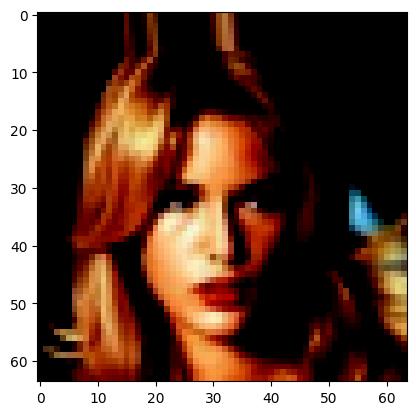

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


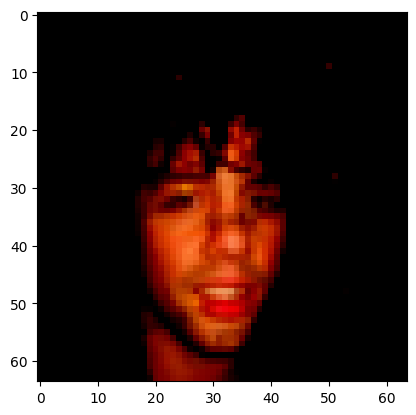

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


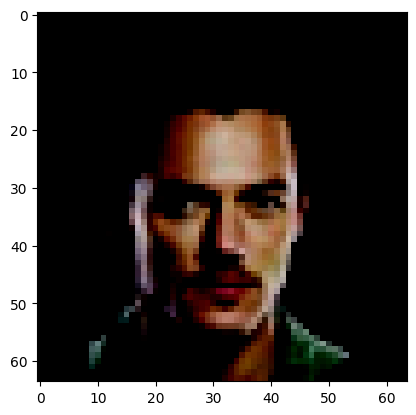

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


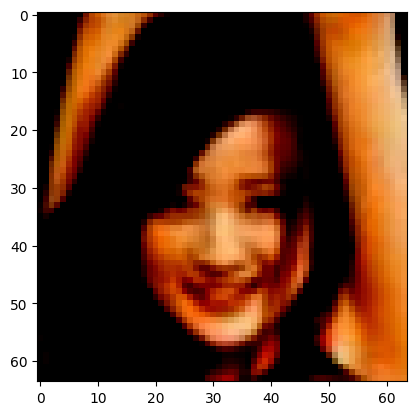

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


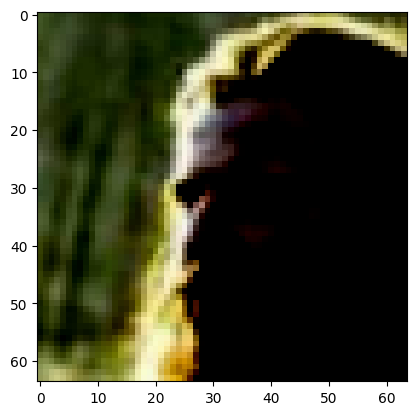

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


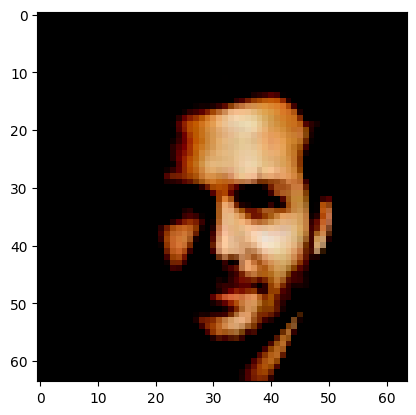

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


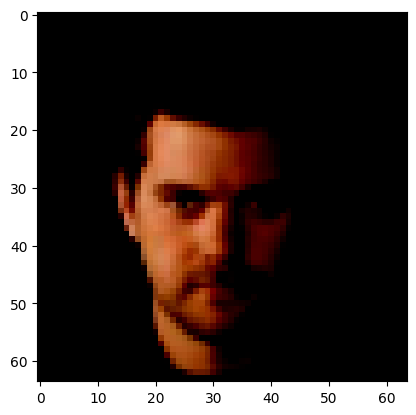

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


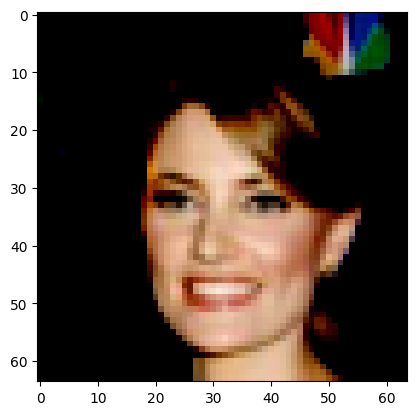

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


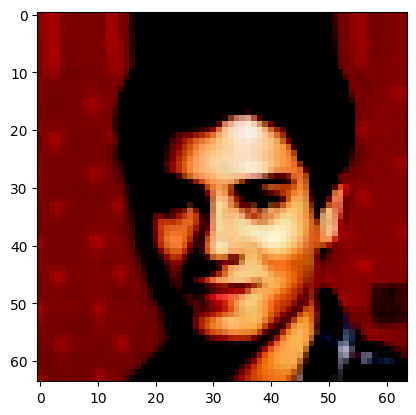

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


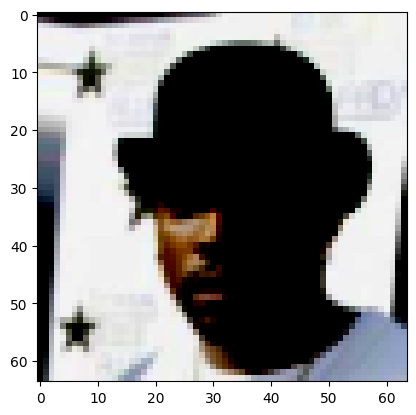

In [6]:
for label, img in enumerate(examples):
    print(img.shape)
    
    img_dense = img.to_dense()

    # Permute dimensions of the dense tensor
    img_permuted = img.permute(0,2,3,1) # Rearrange dimensions to (batch_size, height, width, channels)

    # Visualize the permuted images
    for img in img_permuted:
        plt.imshow(img)
        plt.show()
    break

In [119]:
def generate_random_mask(height, width, max_mask_size=32):
    mask = torch.zeros(1, height, width)  # Initialize mask tensor (single channel)

    # Randomly select mask size and position
    mask_size = np.random.randint(10, max_mask_size)
    x = np.random.randint(0, width - mask_size)
    y = np.random.randint(0, height - mask_size)

    
    mask[:, y:y+mask_size, x:x+mask_size] = 1  # Set mask region to 1 (white)
    

    return mask

def apply_random_mask_to_images(dataset_folder, num_images=3):
    # Get list of image filenames from CelebA dataset folder
    image_filenames = os.listdir(dataset_folder)
    image_filenames = [filename for filename in image_filenames if filename.endswith('.jpg')]

    # Check if there are enough images
    if len(image_filenames) < num_images:
        raise ValueError(f"Not enough images in folder. Found {len(image_filenames)} images.")

    # Select random images from the dataset
    selected_images = np.random.choice(image_filenames, num_images, replace=False)
    
    # Process each selected image
    for image_filename in selected_images:
        # Load image as PIL image
        image_path = os.path.join(dataset_folder, image_filename)
        image = Image.open(image_path).convert('RGB')

        # Convert PIL image to PyTorch tensor
        image_tensor = TF.to_tensor(image)

        # Ensure image tensor has expected dimensions (3 x height x width) for RGB image
        if image_tensor.size(0) != 3:
            continue  # Skip this image if dimensions are incorrect

        _, height, width = image_tensor.size()  # Get image dimensions

        num_mask = random.randint(3, 7)

        masks = torch.empty(num_mask, 1, height, width, dtype=torch.float32)  # Initialize masks tensor

        for i in range(num_mask):
            # Generate random mask
            random_mask = generate_random_mask(height, width)
            masks[i] = random_mask
            #masks = torch.cat((masks.unsqueeze(0), random_mask.unsqueeze(0)))
            
            # Apply mask to the image tensor (only to the damaged regions)
            if i == 0:
                damaged_image_tensor = image_tensor.clone()  # Create a copy of the original image tensor
            damaged_image_tensor[:, random_mask.squeeze() == 1] = 0  # Set masked pixels to zero

        # Convert damaged image tensor back to PIL Image for visualization
        damaged_image = TF.to_pil_image(damaged_image_tensor)

        # Display original image, mask, and damaged image using matplotlib
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(masks.sum(dim=0).squeeze().numpy(), cmap='gray')
        plt.title('Random Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(damaged_image)
        plt.title('Damaged Image')
        plt.axis('off')

        plt.show()
       



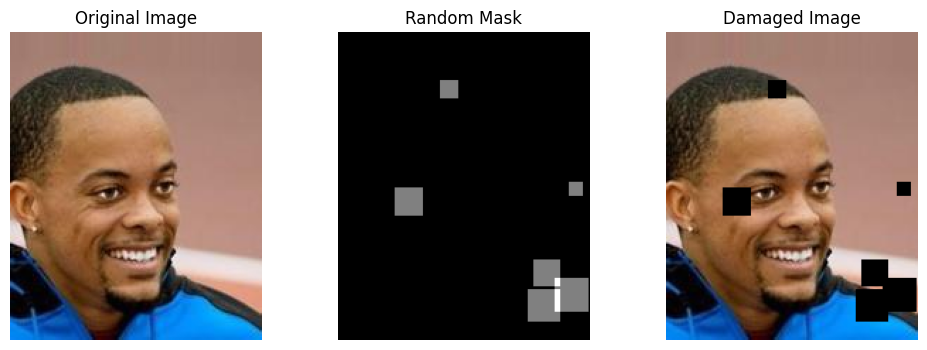

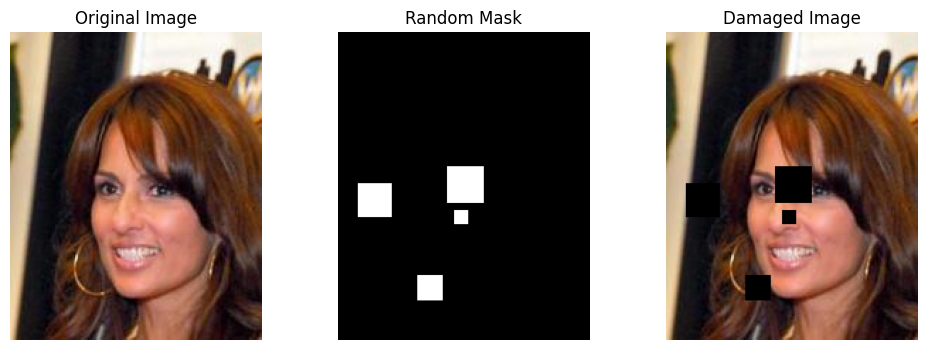

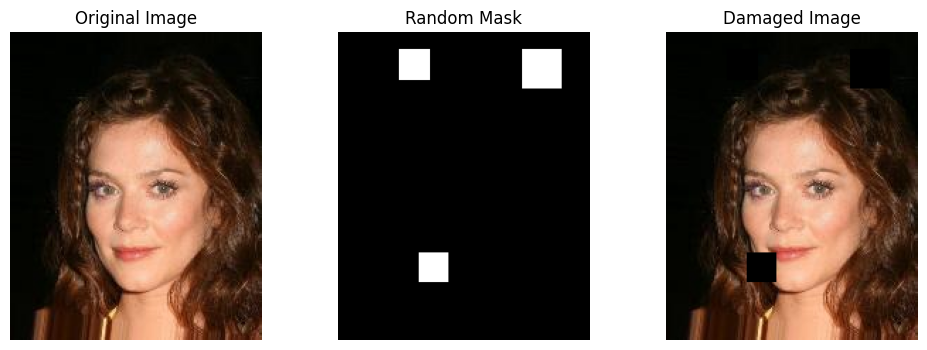

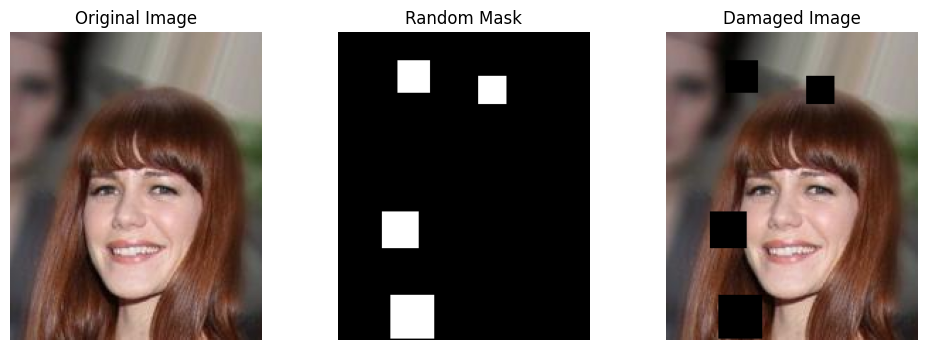

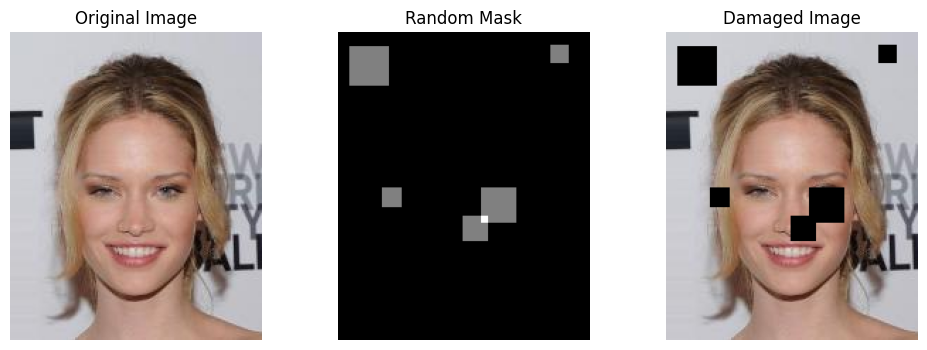

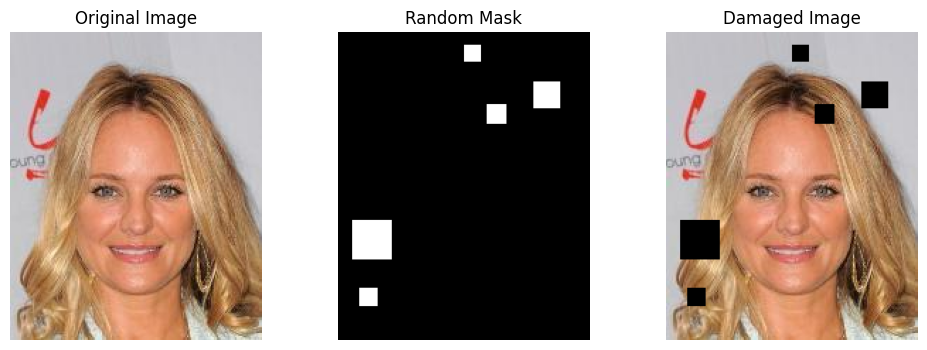

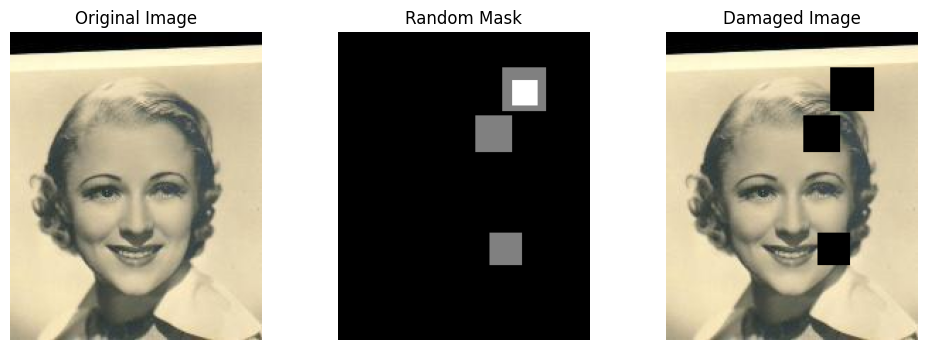

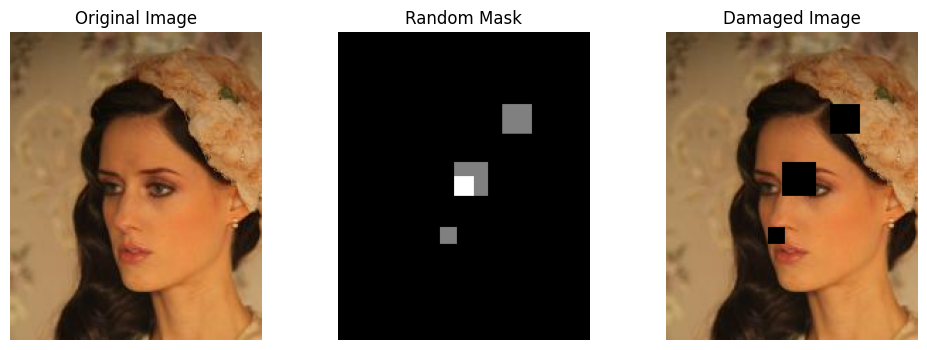

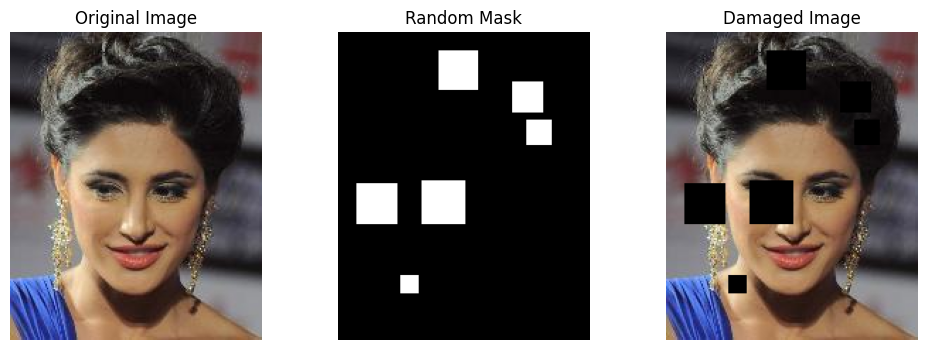

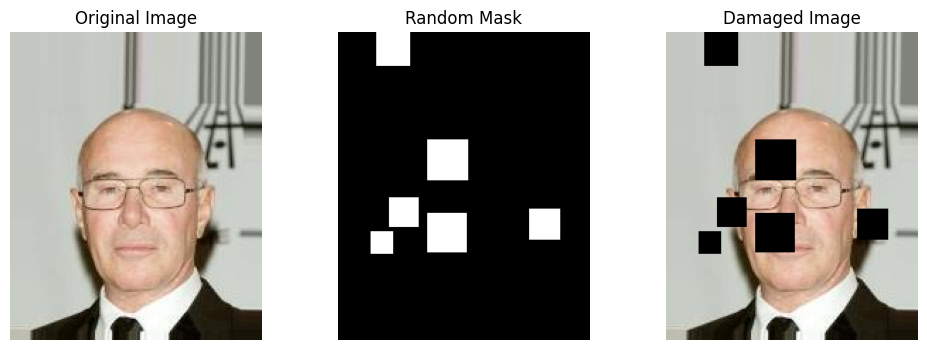

In [120]:
# Define path to CelebA dataset folder
celeba_folder = 'C:\coding\FaceInpaint\FaceInpainting\celeba-dataset\img_align_celeba\img_align_celeba'

# Apply random masks to CelebA dataset images
apply_random_mask_to_images(celeba_folder, num_images=10)  # Specify number of images to process
